# SVM for Digits

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.svm as skl_svm
from sklearn.cross_validation import train_test_split
import seaborn as sns
import os

import time
from sklearn.grid_search import GridSearchCV

In [2]:
digit_data = pd.read_csv('Data/train.csv')

In [3]:
X = digit_data.ix[:,1:digit_data.shape[1]]
y = digit_data['label']

In [4]:
X_subset = X.ix[0:5000,:]
y_subset = y.ix[0:5000]

X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.1)

## Investigating polynomial SVC

The polynomial support vector classifiers did fairly well on average. Let's look deeper into these:

In [ ]:
svc_clf = skl_svm.SVC()

svc_poly_gs_params = [
    {'kernel': ['poly'], 'degree': np.arange(1,6), 'C': np.logspace(-2, 10, num=13)}, 
]
start_time = time.time()
gs_svc_poly_clf = GridSearchCV(svc_clf, param_grid = svc_poly_gs_params, cv=8)
gs_svc_poly_clf.fit(X_subset, y_subset);
end_time = time.time()

print 'Elapsed Time: ', end_time - start_time, ' seconds'

In [10]:
poly_results_list = []
for params, mean_score, scores in gs_svc_poly_clf.grid_scores_:
    print('%0.3f+/-%0.3f %r' % (mean_score, np.std(scores), params))
    poly_results_list.append([mean_score, params['C'], params['degree']])

0.912+/-0.012 {'kernel': 'poly', 'C': 0.01, 'degree': 1}
0.953+/-0.009 {'kernel': 'poly', 'C': 0.01, 'degree': 2}
0.943+/-0.009 {'kernel': 'poly', 'C': 0.01, 'degree': 3}
0.927+/-0.010 {'kernel': 'poly', 'C': 0.01, 'degree': 4}
0.901+/-0.011 {'kernel': 'poly', 'C': 0.01, 'degree': 5}
0.912+/-0.011 {'kernel': 'poly', 'C': 0.10000000000000001, 'degree': 1}
0.953+/-0.009 {'kernel': 'poly', 'C': 0.10000000000000001, 'degree': 2}
0.943+/-0.009 {'kernel': 'poly', 'C': 0.10000000000000001, 'degree': 3}
0.927+/-0.010 {'kernel': 'poly', 'C': 0.10000000000000001, 'degree': 4}
0.901+/-0.011 {'kernel': 'poly', 'C': 0.10000000000000001, 'degree': 5}
0.912+/-0.011 {'kernel': 'poly', 'C': 1.0, 'degree': 1}
0.953+/-0.009 {'kernel': 'poly', 'C': 1.0, 'degree': 2}
0.943+/-0.009 {'kernel': 'poly', 'C': 1.0, 'degree': 3}
0.927+/-0.010 {'kernel': 'poly', 'C': 1.0, 'degree': 4}
0.901+/-0.011 {'kernel': 'poly', 'C': 1.0, 'degree': 5}
0.912+/-0.011 {'kernel': 'poly', 'C': 10.0, 'degree': 1}
0.953+/-0.009 {'ke

In [14]:
poly_results_df = pd.DataFrame(poly_results_list, columns=['mean_score','C','degree'])
poly_results_df.head()

,mean_score,C,degree
0,0.912218,0.01,1
1,0.953009,0.01,2
2,0.943211,0.01,3
3,0.926615,0.01,4
4,0.901420,0.01,5


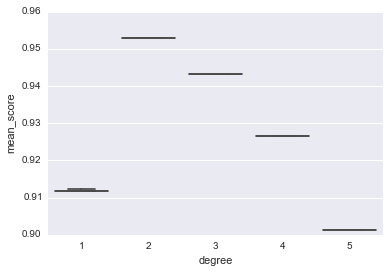

In [17]:
sns.boxplot(x = 'degree', y = 'mean_score', data= poly_results_df)

### Conclusion: This shows that degree = 2 is the best. 

In [5]:
svc_clf = skl_svm.SVC()

svc_poly_gs_params = [
    {'kernel': ['poly'], 'degree': [2], 'C': np.logspace(-10, 10, num=10)} 
]
start_time = time.time()
gs_svc_poly_clf = GridSearchCV(svc_clf, param_grid = svc_poly_gs_params, cv=8, n_jobs=-1)
gs_svc_poly_clf.fit(X_subset, y_subset);
end_time = time.time()

print 'Elapsed Time: ', end_time - start_time, ' seconds'

Elapsed Time:  651.763443947  seconds


### Testing out model on full_data:

In [6]:
from sklearn.cross_validation import cross_val_score

cross_val_score(gs_svc_poly_clf.best_estimator_, X, y, cv=10)

KeyboardInterrupt: 

In [7]:
x = np.array([ 0.97741322,  0.97668887,  0.97524988,  0.97500595,  0.97714286,
        0.97237437,  0.97499405,  0.97879438,  0.97878932,  0.97783603])
x.mean()

0.97642889300000013

So the cross-validated accuracy of classification is 0.9764. Let's try this out on the test data:

In [7]:
best_svc_poly_clf = gs_svc_poly_clf.best_estimator_
best_svc_poly_clf.fit(X, y)

X_test = pd.read_csv('Data/test.csv')
X_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y_pred = best_svc_poly_clf.predict(X_test)

In [9]:
test_output = pd.DataFrame([np.arange(1,28001), y_pred]).T
test_output.columns = ['ImageId', 'Label']
test_output.to_csv('Data/test_output.csv', index=False)

Test Accuracy: 0.97871 (Rank 274)

### Trying slightly different values for C

In [28]:
svc_poly_clf = skl_svm.SVC(
    C=2.8e-5, 
    degree=2, 
    gamma='auto', 
    kernel='poly', 
    tol=0.001
)

svc_poly_clf.fit(X, y)
y_pred = svc_poly_clf.predict(X_test)

test_output = pd.DataFrame([np.arange(1,28001), y_pred]).T
test_output.columns = ['ImageId', 'Label']
test_output.to_csv('Data/test_output.csv', index=False)

No improvement...Test Accuracy: 0.97871 (Rank )

## Optimizing with full dataset

In [29]:
svc_clf = skl_svm.SVC()

svc_poly_gs_params = [
    {'kernel': ['poly'], 'degree': [2], 'C': np.logspace(-8, -5, num=5)} 
]
start_time = time.time()
gs_svc_poly_clf = GridSearchCV(svc_clf, param_grid = svc_poly_gs_params, cv=8)
gs_svc_poly_clf.fit(X, y);
end_time = time.time()

print 'Elapsed Time: ', end_time - start_time, ' seconds'

Elapsed Time:  5690.81699991  seconds


In [30]:
y_pred = gs_svc_poly_clf.best_estimator_.predict(X_test)

test_output = pd.DataFrame([np.arange(1,28001), y_pred]).T
test_output.columns = ['ImageId', 'Label']
test_output.to_csv('Data/test_output.csv', index=False)

In [32]:
gs_svc_poly_clf.best_params_

{'C': 3.1622776601683792e-07, 'degree': 2, 'kernel': 'poly'}

No improvement...Test Accuracy: 0.97857